----------------------------------------------------------------

**Fechas**: 03-02-2025, 10-02-2025, 17-02-2025

**Autor**: Paula Andrea Velasquez Romero

**Materia:** Procesamiento de datos a gran escala 

**Tópico:** Introducción a Pyspark en el Ambiente Databricks 
----------------------------------------------------------------

In [0]:
import numpy as up 
import matplotlib.pyplot as plt
import seaborn as sns 

from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import mean , col, split, count , when , lit , isnan

In [0]:
#Descripción del entorno
spark

In [0]:
#Cargar los Datos
df00 = spark.read.table("default.stroke_pyspark_1_csv")
df00.columns 

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11']

#####1. Se cambian los nombres de las columnas 


In [0]:
nuevosNombres = ['id',
 'genero',
 'edad',
 'hipertension',
 'enfCardiaca',
 'EdoCivil',
 'trabajo',
 'Residencia',
 'Niveldeglucosaprom',
 'IMC',
 'Fumador',
 'Paro Cardiaco']

df01 = df00
for antes, nuevo in zip(df00.columns, nuevosNombres):
    df01 = df01.withColumnRenamed(antes, nuevo)


#####2. Verifirificar el esquema del DataFrame

In [0]:
df01.printSchema()

root
 |-- id: string (nullable = true)
 |-- genero: string (nullable = true)
 |-- edad: string (nullable = true)
 |-- hipertension: string (nullable = true)
 |-- enfCardiaca: string (nullable = true)
 |-- EdoCivil: string (nullable = true)
 |-- trabajo: string (nullable = true)
 |-- Residencia: string (nullable = true)
 |-- Niveldeglucosaprom: string (nullable = true)
 |-- IMC: string (nullable = true)
 |-- Fumador: string (nullable = true)
 |-- Paro Cardiaco: string (nullable = true)



#####3. En relación a la coherencia de los datos , se procede a : 

   - El tipo de datos "IMC" , se pasa a tipo de dato "DOUBLE"

   - El tipo de dato " edad", se pasa a tipo de dato " INTERGER"

In [0]:
df01 = df01.withColumn("edad", df01.edad.cast("int"))
df01 = df01.withColumn("IMC", df01.IMC.cast("double"))

df01.printSchema()

root
 |-- id: string (nullable = true)
 |-- genero: string (nullable = true)
 |-- edad: integer (nullable = true)
 |-- hipertension: string (nullable = true)
 |-- enfCardiaca: string (nullable = true)
 |-- EdoCivil: string (nullable = true)
 |-- trabajo: string (nullable = true)
 |-- Residencia: string (nullable = true)
 |-- Niveldeglucosaprom: string (nullable = true)
 |-- IMC: double (nullable = true)
 |-- Fumador: string (nullable = true)
 |-- Paro Cardiaco: string (nullable = true)



In [0]:
#MostrarDatos
df01.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+------------------+----+---------------+-------------+
|   id|genero|edad|hipertension|  enfCardiaca|    EdoCivil|      trabajo|    Residencia|Niveldeglucosaprom| IMC|        Fumador|Paro Cardiaco|
+-----+------+----+------------+-------------+------------+-------------+--------------+------------------+----+---------------+-------------+
|   id|gender|NULL|hypertension|heart_disease|ever_married|    work_type|Residence_type| avg_glucose_level|NULL| smoking_status|       stroke|
| 9046|  Male|  67|           0|            1|         Yes|      Private|         Urban|            228.69|36.6|formerly smoked|            1|
|51676|Female|  61|           0|            0|         Yes|Self-employed|         Rural|            202.21|NULL|   never smoked|            1|
|31112|  Male|  80|           0|            1|         Yes|      Private|         Rural|            105.92|32.5|   never smoked|            1|

#####4. Exploración de categorias

In [0]:
#Obtener cantidad total de registros
df01.groupby(['genero']).count().show()

+------+-----+
|genero|count|
+------+-----+
|Female| 2994|
| Other|    1|
|gender|    1|
|  Male| 2115|
+------+-----+



In [0]:
df01.groupby(['hipertension']).count().show()

+------------+-----+
|hipertension|count|
+------------+-----+
|           0| 4612|
|           1|  498|
|hypertension|    1|
+------------+-----+



In [0]:
df01.groupby(['enfCardiaca']).count().show()

+-------------+-----+
|  enfCardiaca|count|
+-------------+-----+
|            0| 4834|
|heart_disease|    1|
|            1|  276|
+-------------+-----+



In [0]:
df01.groupby(['EdoCivil']).count().show()

+------------+-----+
|    EdoCivil|count|
+------------+-----+
|ever_married|    1|
|          No| 1757|
|         Yes| 3353|
+------------+-----+



In [0]:
df01.groupby(['trabajo']).count().show()

+-------------+-----+
|      trabajo|count|
+-------------+-----+
|    work_type|    1|
| Never_worked|   22|
|Self-employed|  819|
|      Private| 2925|
|     children|  687|
|     Govt_job|  657|
+-------------+-----+



In [0]:
df01.groupby(['Residencia']).count().show()

+--------------+-----+
|    Residencia|count|
+--------------+-----+
|         Urban| 2596|
|Residence_type|    1|
|         Rural| 2514|
+--------------+-----+



In [0]:
df01.groupby(['Fumador']).count().show()

+---------------+-----+
|        Fumador|count|
+---------------+-----+
| smoking_status|    1|
|         smokes|  789|
|        Unknown| 1544|
|   never smoked| 1892|
|formerly smoked|  885|
+---------------+-----+



In [0]:
df01.groupby(['Paro Cardiaco']).count().show()

+-------------+-----+
|Paro Cardiaco|count|
+-------------+-----+
|            0| 4861|
|            1|  249|
|       stroke|    1|
+-------------+-----+



In [0]:
#Se descarta el registro cuyo valor en género es "Other"
df02 = df01.where("genero <> 'Other'")

#Se verifica que ya no esta "Other"
df02.groupby(['genero']).count().show()

+------+-----+
|genero|count|
+------+-----+
|Female| 2994|
|gender|    1|
|  Male| 2115|
+------+-----+



#####5. Identificar Nulos

In [0]:
df01.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df01.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+-------------+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|Residencia|Niveldeglucosaprom|IMC|Fumador|Paro Cardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+-------------+
|  0|     0|   1|           0|          0|       0|      0|         0|                 0|202|      0|            0|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+-------------+



Se puede observar que la columna IMC presenta datos Nulos o Imposibles. A pesar que el porcentaje de datos nulos es muy bajo, se requiere crear una estrategia para mutar o cambiar los datos, sin que sean eliminados.
- Se requiere hacer estaratos de promedios cada 10 años
- Los promedios por estratos se catalogan por género
- Se sustituye por el promedio de los nulos según género/estrato_edad

In [0]:
####### Se extrae promedio IMC por Estrato y Female
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')<10)).select(mean(col('IMC'))).collect()
avg20F = df02.where((col('genero')== lit('Female')) & (col('edad')>10) & (col('edad')<20)).select(mean(col('edad'))).collect()
avg30F = df02.where((col('genero')== lit('Female')) & (col('edad')>20) & (col('edad')<30)).select(mean(col('edad'))).collect()
avg40F = df02.where((col('genero')== lit('Female')) & (col('edad')>30) & (col('edad')<40)).select(mean(col('edad'))).collect()
avg50F = df02.where((col('genero')== lit('Female')) & (col('edad')>40) & (col('edad')<50)).select(mean(col('edad'))).collect()
avg60F = df02.where((col('genero')== lit('Female')) & (col('edad')>50) & (col('edad')<60)).select(mean(col('edad'))).collect()
avg70F = df02.where((col('genero')== lit('Female')) & (col('edad')>60) & (col('edad')<70)).select(mean(col('edad'))).collect()
avg80F = df02.where((col('genero')== lit('Female')) & (col('edad')>70) & (col('edad')<80)).select(mean(col('edad'))).collect()
avg90F = df02.where((col('genero')== lit('Female')) & (col('edad')>80) & (col('edad')<90)).select(mean(col('edad'))).collect()

print(avg10F)

[Row(avg(IMC)=18.687962962962963)]


In [0]:
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 10), avg10F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 20), avg20F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 30), avg30F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 40), avg40F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 50), avg50F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 60), avg60F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 70), avg70F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 80), avg80F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 90), avg90F[0][0]).otherwise(df02['IMC']))



In [0]:
df03.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df03.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+-------------+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|Residencia|Niveldeglucosaprom|IMC|Fumador|Paro Cardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+-------------+
|  0|     0|   1|           0|          0|       0|      0|         0|                 0|105|      0|            0|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+-------------+



In [0]:
####### Se extrae promedio IMC por Estrato y Male
avg10M = df02.where((col('genero')== lit('Male')) & (col('edad')<10)).select(mean(col('IMC'))).collect()
avg20M = df02.where((col('genero')== lit('Male')) & (col('edad')>10) & (col('edad')<20)).select(mean(col('edad'))).collect()
avg30M = df02.where((col('genero')== lit('Male')) & (col('edad')>20) & (col('edad')<30)).select(mean(col('edad'))).collect()
avg40M = df02.where((col('genero')== lit('Male')) & (col('edad')>30) & (col('edad')<40)).select(mean(col('edad'))).collect()
avg50M = df02.where((col('genero')== lit('Male')) & (col('edad')>40) & (col('edad')<50)).select(mean(col('edad'))).collect()
avg60M = df02.where((col('genero')== lit('Male')) & (col('edad')>50) & (col('edad')<60)).select(mean(col('edad'))).collect()
avg70M = df02.where((col('genero')== lit('Male')) & (col('edad')>60) & (col('edad')<70)).select(mean(col('edad'))).collect()
avg80M = df02.where((col('genero')== lit('Male')) & (col('edad')>70) & (col('edad')<80)).select(mean(col('edad'))).collect()
avg90M = df02.where((col('genero')== lit('Male')) & (col('edad')>80) & (col('edad')<90)).select(mean(col('edad'))).collect()

print(avg10M)

[Row(avg(IMC)=19.03168724279836)]


In [0]:
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 10), avg10M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 20), avg20M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 30), avg30M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 40), avg40M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 50), avg50M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 60), avg60M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 70), avg70M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 80), avg80M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 90), avg90M[0][0]).otherwise(df02['IMC']))

In [0]:
df04.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df04.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+-------------+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|Residencia|Niveldeglucosaprom|IMC|Fumador|Paro Cardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+-------------+
|  0|     0|   1|           0|          0|       0|      0|         0|                 0| 98|      0|            0|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+-------------+



#####6. Función Para calcular promedio de IMC

In [0]:
#Calcular promedio de IMC a partir de las edades y el género
def avg_imc_by_gender_and_age_range(df, gender, age_ranges):
    results = []
    
    for lower, upper in age_ranges:
        avg_imc = df.where(
            (df["genero"] == lit(gender)) & 
            (df["edad"] > lower) & 
            (df["edad"] <= upper)
        ).select(mean("IMC")).collect()
        
        results.append({
            "age_range": f"{lower}-{upper}",
            "avg_imc": avg_imc[0][0] if avg_imc else None
        })
    
    return results

age_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90)]
gender = "Female"

# Llamada a la función
avg_imc_results = avg_imc_by_gender_and_age_range(df02, gender, age_ranges)

# Mostrar resultados
for result in avg_imc_results:
    print(f"Para el genero {gender} en el Rango de Edad {result['age_range']}: Promedio IMC = {result['avg_imc']}")

Para el genero Female en el Rango de Edad 0-10: Promedio IMC = 18.784186046511625
Para el genero Female en el Rango de Edad 10-20: Promedio IMC = 25.516000000000012
Para el genero Female en el Rango de Edad 20-30: Promedio IMC = 28.640163934426226
Para el genero Female en el Rango de Edad 30-40: Promedio IMC = 31.16508313539193
Para el genero Female en el Rango de Edad 40-50: Promedio IMC = 30.94269662921346
Para el genero Female en el Rango de Edad 50-60: Promedio IMC = 31.923094170403576
Para el genero Female en el Rango de Edad 60-70: Promedio IMC = 30.717080745341597
Para el genero Female en el Rango de Edad 70-80: Promedio IMC = 29.233229813664597
Para el genero Female en el Rango de Edad 80-90: Promedio IMC = 28.101428571428578


#####7. Gráfica

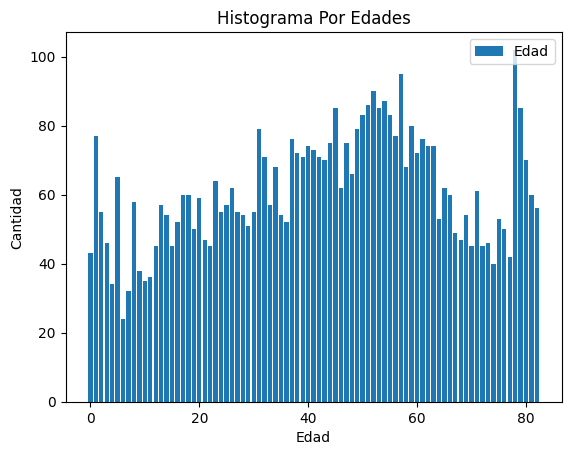

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession


try:
    df01
except NameError:
    data = {"edad": [25, 30, 35, 25, 40, 30, 30, 25, 35, 40, 40, 25]}
    df01 = pd.DataFrame(data)

if isinstance(df01, pd.DataFrame):
    df_grouped = df01.groupby("edad").size().reset_index(name="cantidad")
    edades = df_grouped["edad"]
    cantidades = df_grouped["cantidad"]

elif "pyspark.sql.dataframe.DataFrame" in str(type(df01)):
    df_grouped = df01.groupBy("edad").count().orderBy("edad")
    df_pandas = df_grouped.toPandas()  # Convertir a Pandas
    edades = df_pandas["edad"]
    cantidades = df_pandas["count"]

else:
    raise TypeError("df01 no es un DataFrame válido de Pandas o PySpark")

plt.bar(edades, cantidades)
plt.ylabel("Cantidad")
plt.xlabel("Edad")
plt.title("Histograma Por Edades")
plt.legend(["Edad"], loc="upper right")

plt.show()

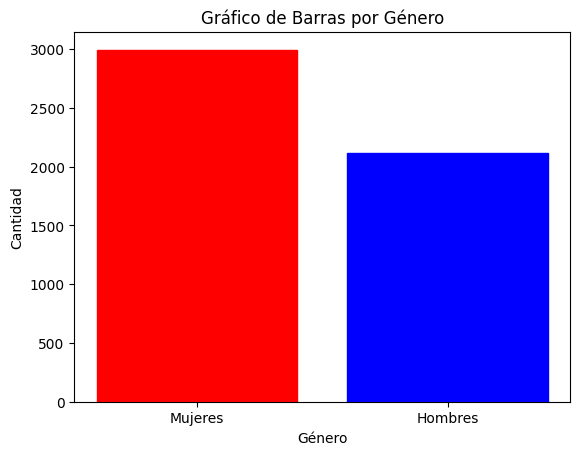

In [0]:
#Gráfica de género

# Filtrar los datos para eliminar el valor 'gender' y mantener solo 'Female' y 'Male'
df_filtered = df04.filter((col('genero') == 'Female') | (col('genero') == 'Male'))

# Obtener el conteo por grupo en la columna 'genero'
genero_count = df_filtered.groupby('genero').count().select('genero', 'count')

# Convertir a RDD y luego a lista para trabajar con ella
genero_count_list = genero_count.rdd.map(lambda x: (x[0], x[1])).collect()

# Separa las categorías y los conteos
categorias = ['Mujeres', 'Hombres']  
cantidad = [x[1] for x in genero_count_list]  
# Crear la gráfica de barras
grafica = plt.bar(categorias, cantidad)

grafica[0].set_color('r')  # Colorea la barra para 'Mujeres' en rojo
grafica[1].set_color('b')  # Colorea la barra para 'Hombres' en azul
plt.ylabel('Cantidad')
plt.xlabel('Género')
plt.title('Gráfico de Barras por Género')
plt.show()


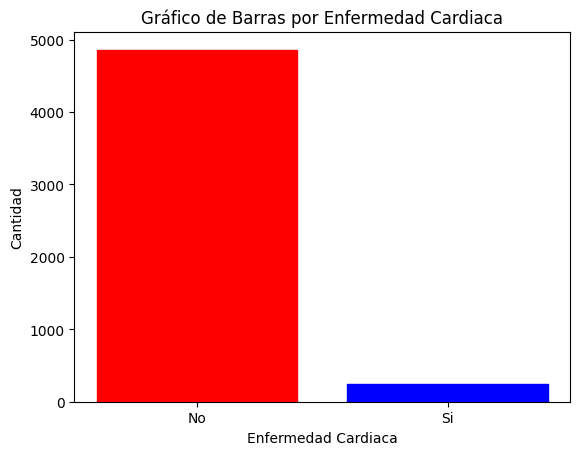

In [0]:
#Gráficas de enfermedades gacrdiacas

enfCardiaca = df04.groupBy('Paro Cardiaco').count().select('Paro Cardiaco', 'count')
# Filtrar los datos para eliminar el valor 'Stroke' y mantener solo '0' y '1'
enfCardiaca_filtered = enfCardiaca.filter((col('Paro Cardiaco') == 0) | (col('Paro Cardiaco') == 1))
# Convertir a RDD y luego a una lista
enfCardiaca_filtered = enfCardiaca_filtered.rdd.map(lambda x: (x[0], x[1])).collect()
# Separa los valores de las categorías y los conteos
categorias = ['No', 'Si']  # 'No' es 0 y 'Si' es 1
cantidad = [x[1] for x in enfCardiaca_filtered]
grafica = plt.bar(categorias, cantidad)
grafica[0].set_color('r')  # Colorea la barra para 'No' (0) en rojo
grafica[1].set_color('b')  # Colorea la barra para 'Si' (1) en azul
# Etiquetas y formato
plt.ylabel('Cantidad')
plt.xlabel('Enfermedad Cardiaca')
plt.title('Gráfico de Barras por Enfermedad Cardiaca')
plt.show()